In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Dataset

##Datasets Merge

In [ ]:
cbs = pd.read_csv("cust_best_sample.csv")
cbs["unique_customer_id"].duplicated().sum()

0

In [ ]:
cs = pd.read_csv("cust_sample.csv")
cs.duplicated().sum()

0

In [ ]:
cs["unique_customer_id"].duplicated().sum()

0

In [ ]:
cs["cb_customer_id"].duplicated().sum()

0

In [ ]:
ts = pd.read_csv("trx_sample.csv")

In [ ]:
df = ts.merge(cs, on="cb_customer_id", how="left")
df = df.merge(cbs, on="unique_customer_id", how="left")
df.to_csv("dataset.csv", index=False)
df.shape

(153532, 9)

In [ ]:
df.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0   6821860387409851780       2016-07-26              -0.327119            90   
1   3372770238413923649       2016-06-20              -0.389015            26   
2   3220055865641973068       2016-06-15              -0.344771            90   
3   1603206957613929399       2016-06-20              -1.139010            33   
4  17331442057655027512       2016-05-12              -0.168271            27   

   amount_before_discount  amount_discount    unique_customer_id   gender  \
0               -0.411608        -0.443104  14833856522183602191  UNKNOWN   
1               -0.331083        -0.281383    219680563978627406  UNKNOWN   
2               -0.447712        -0.488551  13102778631438780637  UNKNOWN   
3               -1.580552        -1.771293  13698985552782800647  UNKNOWN   
4               -0.124056        -0.092018   8221697626171255583  UNKNOWN   

  date_of_birth  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

##Data Analysis

### Initial

In [ ]:
df = pd.read_csv("/content/dataset.csv")
df.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0   6821860387409851780       2016-07-26              -0.327119            90   
1   3372770238413923649       2016-06-20              -0.389015            26   
2   3220055865641973068       2016-06-15              -0.344771            90   
3   1603206957613929399       2016-06-20              -1.139010            33   
4  17331442057655027512       2016-05-12              -0.168271            27   

   amount_before_discount  amount_discount    unique_customer_id   gender  \
0               -0.411608        -0.443104  14833856522183602191  UNKNOWN   
1               -0.331083        -0.281383    219680563978627406  UNKNOWN   
2               -0.447712        -0.488551  13102778631438780637  UNKNOWN   
3               -1.580552        -1.771293  13698985552782800647  UNKNOWN   
4               -0.124056        -0.092018   8221697626171255583  UNKNOWN   

  date_of_birth  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [ ]:
df.duplicated().sum()

319

In [ ]:
df = df.drop_duplicates(keep = 'first').reset_index(drop = True)
df.duplicated().sum()

0

In [ ]:
df["gender"] = df["gender"].replace("UNKNOWN", None) # Gender UNKNOWN to None
df.info()
print("Null Ratios: \n", df.isnull().sum()/len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153213 entries, 0 to 153212
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cb_customer_id          153213 non-null  uint64 
 1   transaction_date        153213 non-null  object 
 2   amount_after_discount   153213 non-null  float64
 3   cb_branch_id            153213 non-null  int64  
 4   amount_before_discount  153213 non-null  float64
 5   amount_discount         153213 non-null  float64
 6   unique_customer_id      153213 non-null  uint64 
 7   gender                  4748 non-null    object 
 8   date_of_birth           3296 non-null    object 
dtypes: float64(3), int64(1), object(3), uint64(2)
memory usage: 10.5+ MB
Null Ratios: 
 cb_customer_id            0.000000
transaction_date          0.000000
amount_after_discount     0.000000
cb_branch_id              0.000000
amount_before_discount    0.000000
amount_discount           0.0000

### with Birth Value

When the entire dataset is considered, the birth years and therefore the age data obtained are 97% incomplete. Despite this, the connection with the rest of the data was examined and as seen in the last pairplot, no connection was observed. In addition, the fact that some of the age data were negative reduced the confidence in the data.

In [ ]:
df_with_birth = df.copy()
df_with_birth = df_with_birth.drop(columns=["gender"], axis=1)
df_with_birth = df_with_birth.dropna().reset_index(drop = True)
df_with_birth

cb_customer_id transaction_date  amount_after_discount  \
0      2092464368939200128       2016-05-22               1.005446   
1     14550316097627001490       2016-07-02              -0.354054   
2      5082247595760682523       2016-05-15               1.088273   
3      5742529392146341069       2016-06-01               0.140618   
4      7174315823374197496       2016-04-30              -0.159445   
...                    ...              ...                    ...   
3291   7695243391954070309       2016-07-31              -0.355370   
3292    310021077981642575       2016-06-13              -0.080031   
3293  17359879451535605992       2016-08-14              -0.291834   
3294   8857562372523565688       2016-05-01              -1.668529   
3295   8607267054565151056       2016-09-05              -0.398603   

      cb_branch_id  amount_before_discount  amount_discount  \
0               91                1.889816         2.330320   
1               90               -0.451281        -0.488551   
2               91                1.104511         1.063576   
3               90               -0.169482        -0.346542   
4               90               -0.321496        -0.403350   
...            ...                     ...              ...   
3291            90               -0.425402        -0.447649   
3292            37                0.092375         0.190899   
3293            90               -0.390720        -0.431754   
3294            31               -1.432341        -1.225933   
3295            90               -0.454118        -0.466396   

        unique_customer_id date_of_birth  
0     13188427499963755108    1984-06-15  
1     14651672950433594654    1993-02-10  
2      8220620186652615993    1983-06-16  
3      1945781267273986457    1991-08-11  
4      4669903180720279344    1988-05-02  
...                    ...           ...  
3291   7587301352337356222    1991-08-26  
3292   1469352826613035343    2054-07-01  
3293   2329400852704958000    1980-07-13  
3294   9467753456986916203    1994-03-26  
3295   7284252260495010413    1987-08-06  

[3296 rows x 8 columns]

In [ ]:
today = datetime(2016, 4, 1)
df_with_birth["date_of_birth"] = pd.to_datetime(df_with_birth["date_of_birth"], format="%Y-%m-%d")
df_with_birth["age"] = ((today - df_with_birth["date_of_birth"]).dt.days / 365.25).astype(int)
df_with_birth.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0   2092464368939200128       2016-05-22               1.005446            91   
1  14550316097627001490       2016-07-02              -0.354054            90   
2   5082247595760682523       2016-05-15               1.088273            91   
3   5742529392146341069       2016-06-01               0.140618            90   
4   7174315823374197496       2016-04-30              -0.159445            90   

   amount_before_discount  amount_discount    unique_customer_id  \
0                1.889816         2.330320  13188427499963755108   
1               -0.451281        -0.488551  14651672950433594654   
2                1.104511         1.063576   8220620186652615993   
3               -0.169482        -0.346542   1945781267273986457   
4               -0.321496        -0.403350   4669903180720279344   

  date_of_birth  age  
0    1984-06-15   31  
1    1993-02-10   23  
2    1983-06-16   32  
3    1991-08-11   24  
4    1988-05-02   27

<Axes: xlabel='age', ylabel='Count'>

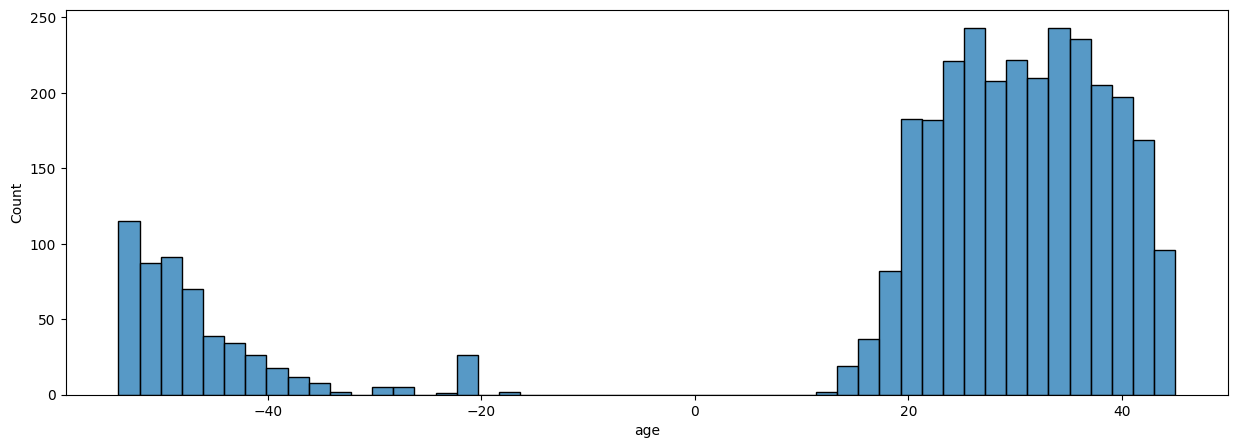

In [ ]:
plt.figure(figsize = (15, 5))
sns.histplot(df_with_birth["age"])

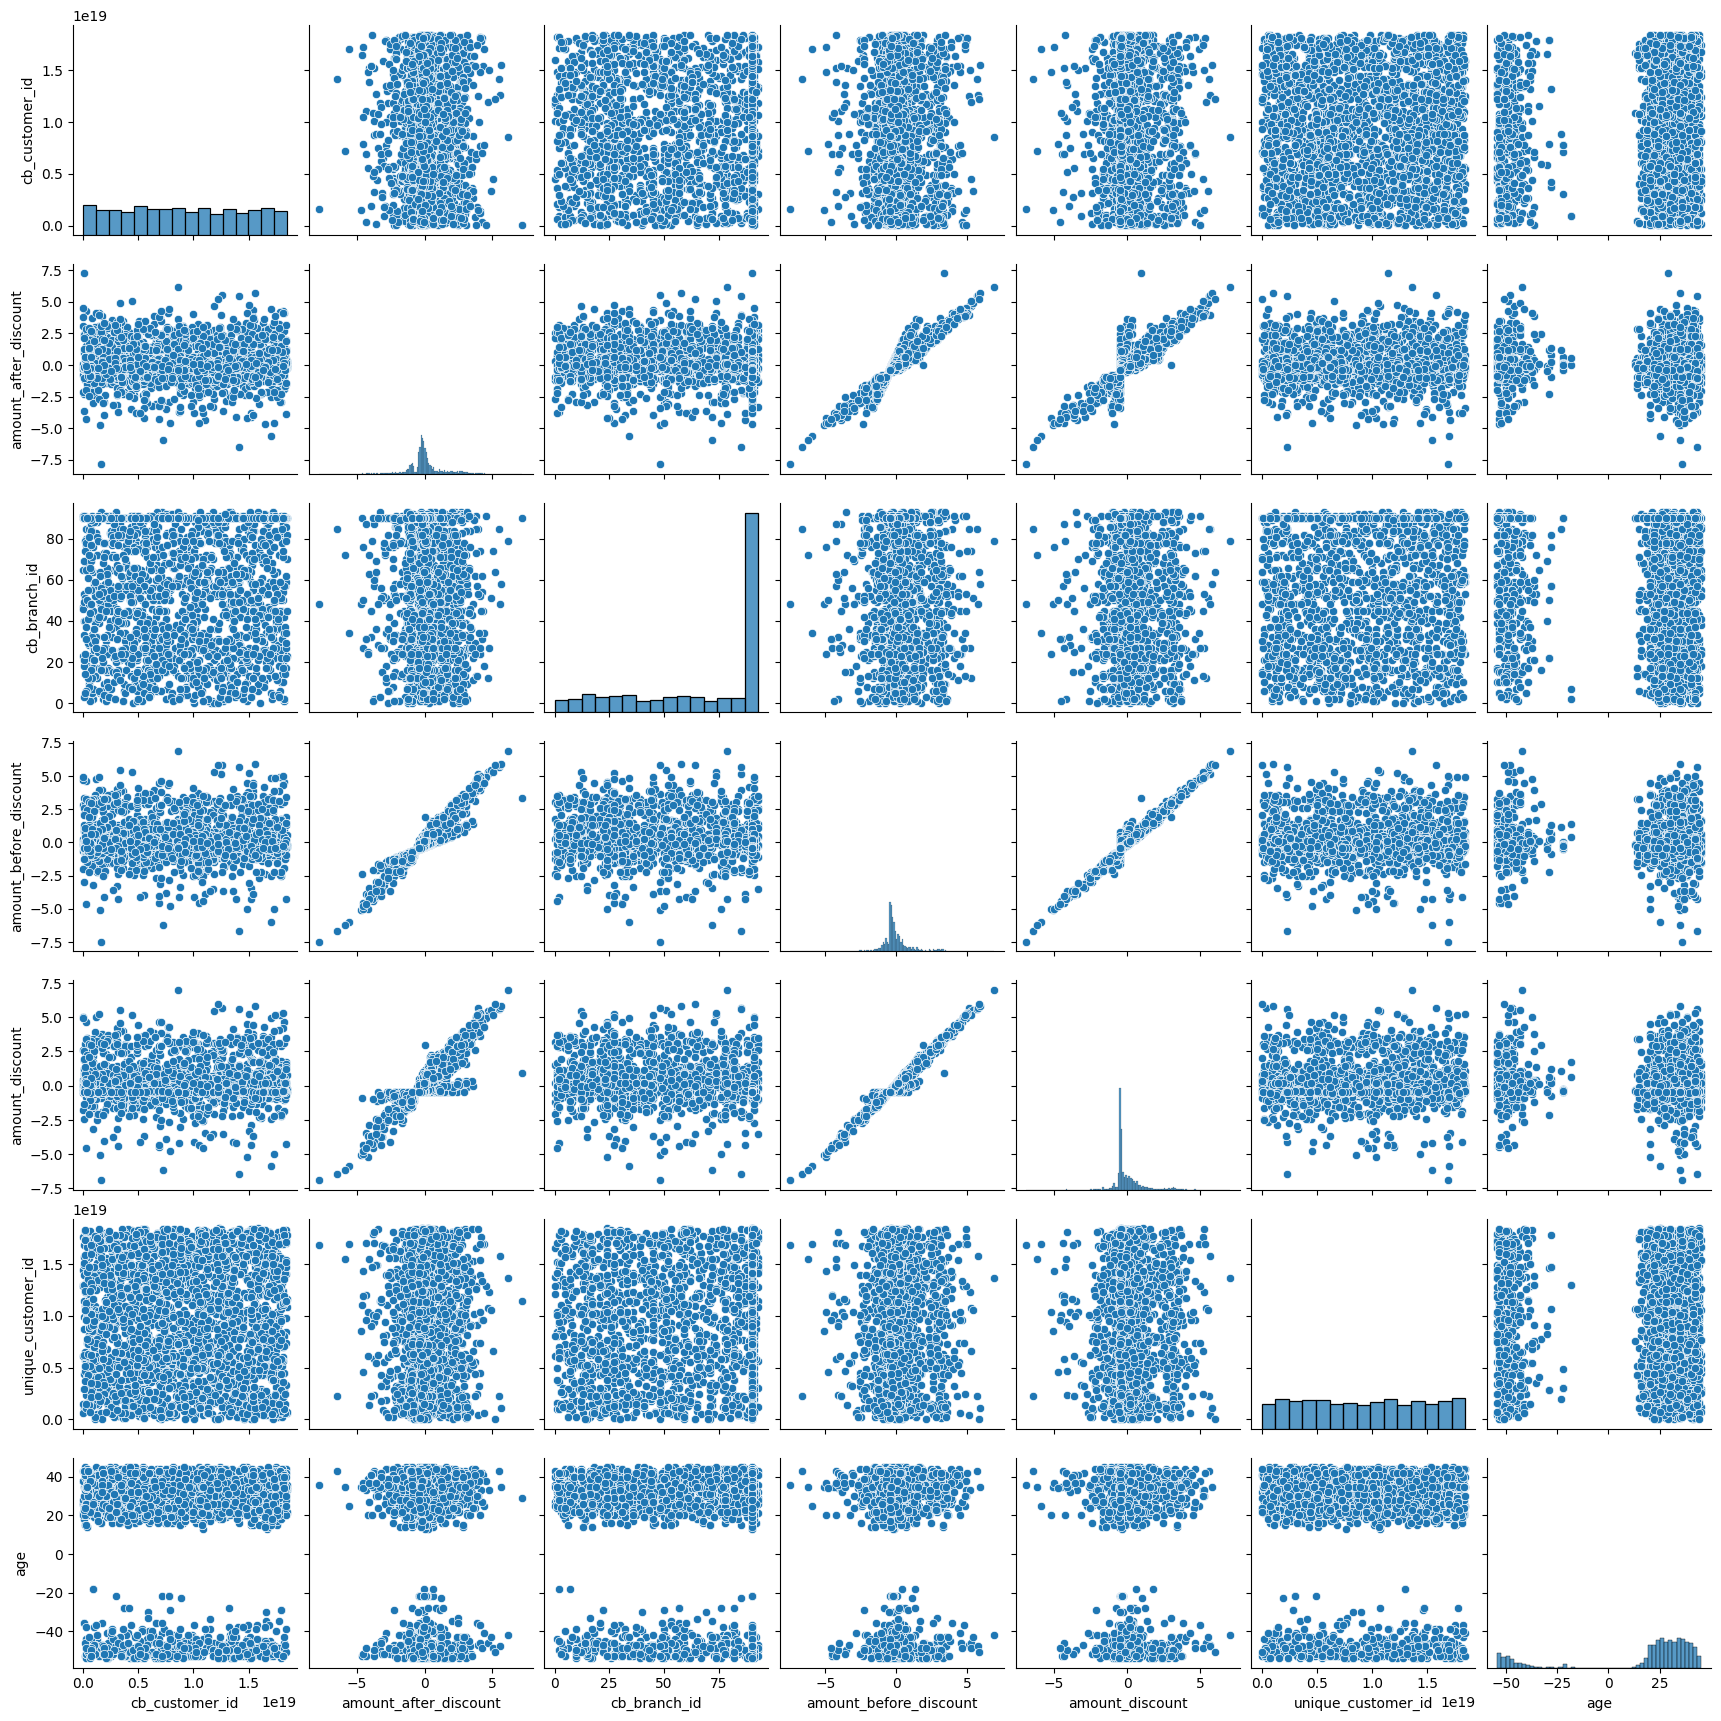

In [ ]:
sns.pairplot(df_with_birth)

### with Gender Value

The gender data is 96% missing when the entire dataset is considered. However, the connection with the rest of the data was examined and no connection was observed as seen in the last pairplot.

In [ ]:
df_with_gender = df.copy()
df_with_gender = df_with_gender.drop(columns=["date_of_birth"], axis=1)
df_with_gender = df_with_gender.dropna().reset_index(drop = True)
df_with_gender.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0  13650987313034452031       2016-08-28              -0.256511            17   
1   9033312063784033972       2016-05-19               0.061184            49   
2  17485183387156864404       2016-04-21               2.564931            72   
3  11674542940049244621       2016-05-29              -0.141793            58   
4   8602615345750167413       2016-05-15              -0.396354             2   

   amount_before_discount  amount_discount    unique_customer_id  gender  
0               -0.267920        -0.262443   5444268270643950649    MALE  
1               -0.101797        -0.194273  10241057280124321001    MALE  
2                2.722813         2.692143   9860394394364777547  FEMALE  
3                0.284838         0.526067   2757941977525905438  FEMALE  
4               -0.446129        -0.455352   3575740722397422870    MALE

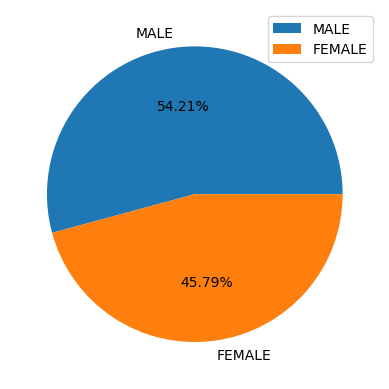

In [ ]:
plt.pie(df_with_gender['gender'].value_counts(),labels = ['MALE', 'FEMALE'], autopct = "%.2f%%");
plt.legend();

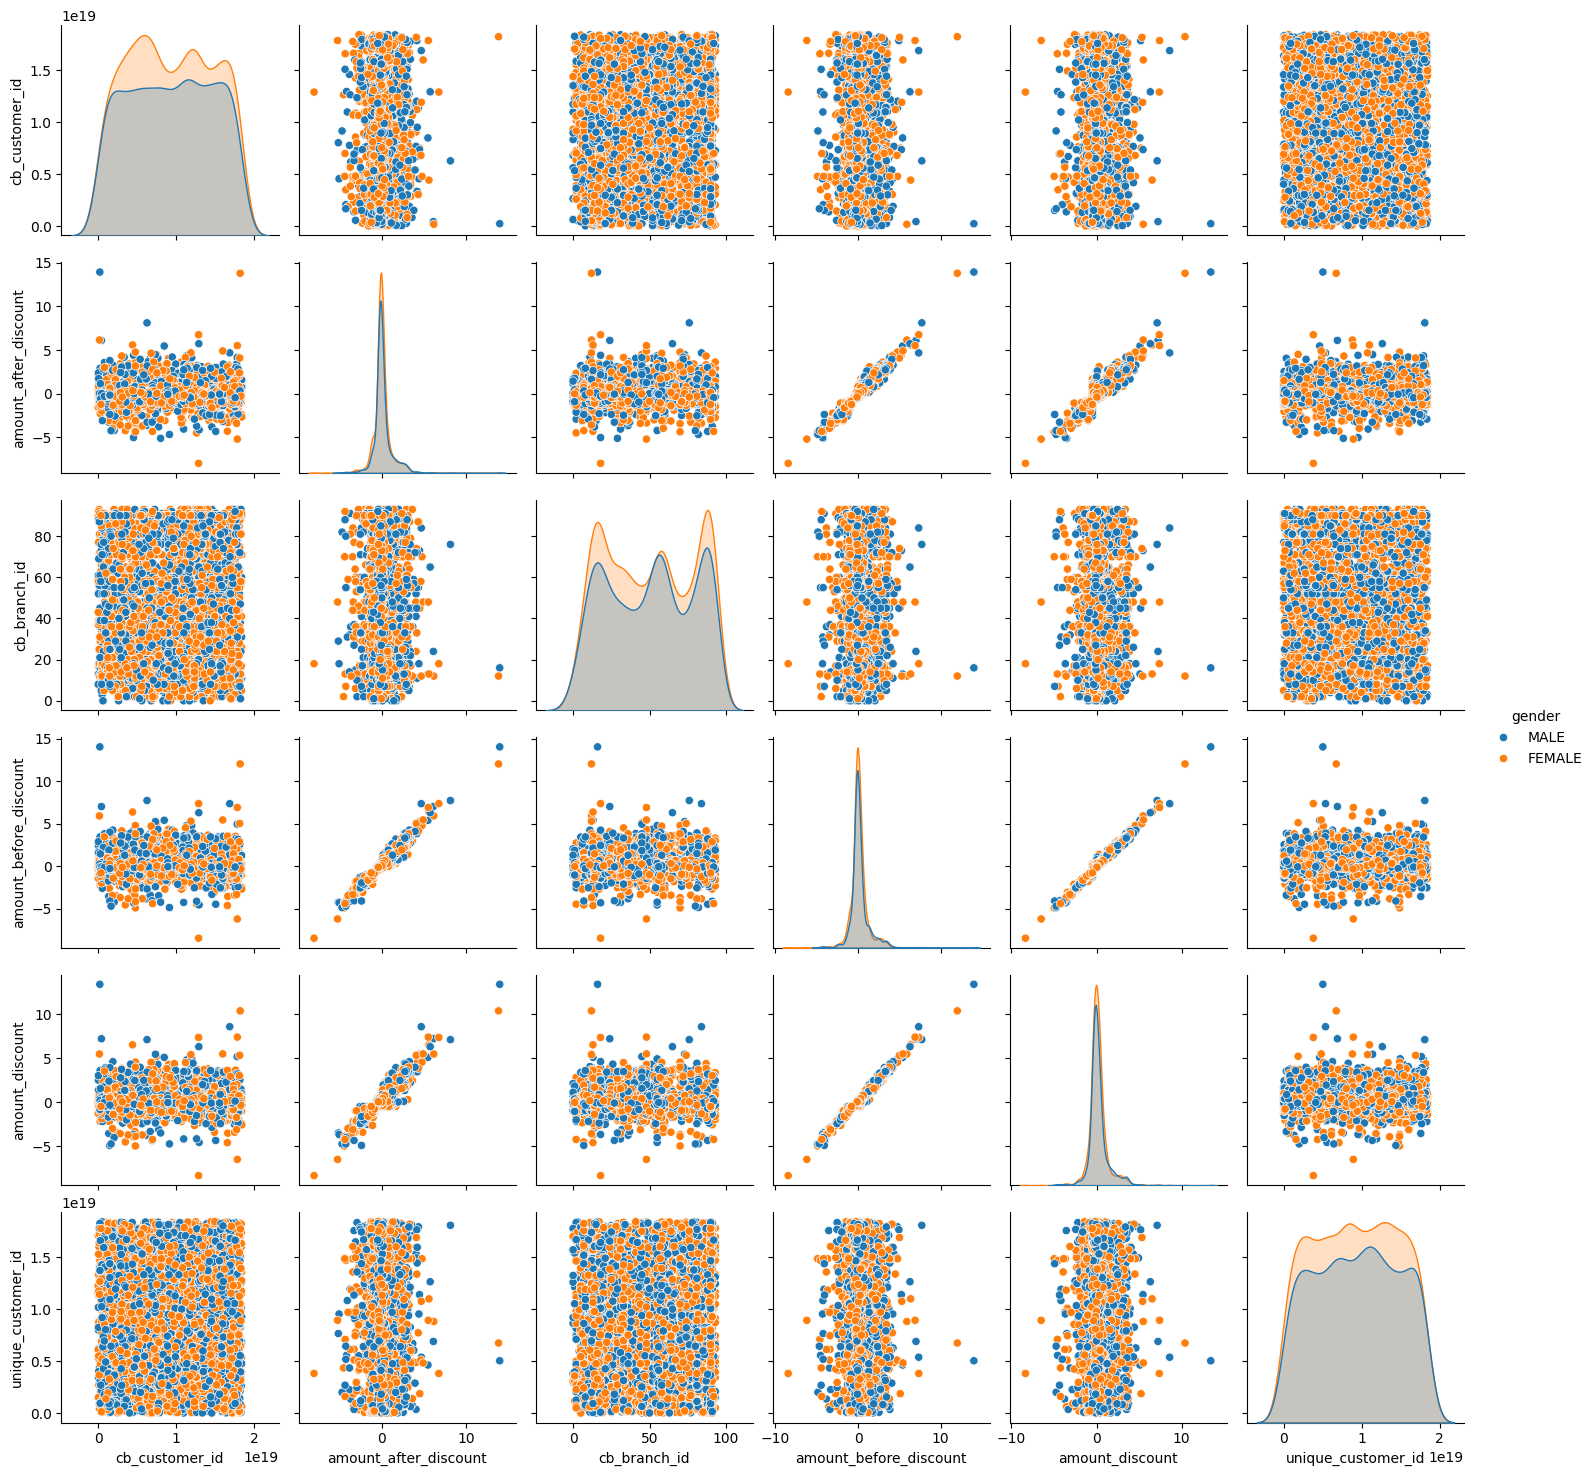

In [ ]:
sns.pairplot(df_with_gender, hue='gender')

### with Both Gender and Birth Value

Considering the above analysis and the scarcity of both gender and birth data, the data is insufficient for analysis due to the storage of only 90 different customers, which leaves both data to be found together. Also, no period was found between age and gender.

In [ ]:
df_with_both = df.copy()
df_with_both = df_with_both.dropna().reset_index(drop = True)
df_with_both

cb_customer_id transaction_date  amount_after_discount  \
0     5629154411999255478       2016-09-13              -0.115315   
1    12176855592165538714       2016-08-03              -0.425958   
2    14839277829347093780       2016-05-13               1.445161   
3    16784522075866102880       2016-05-27               0.800753   
4     2208990272022779720       2016-05-08               2.183624   
..                    ...              ...                    ...   
111   4889819386671603827       2016-06-27               0.098166   
112  10927175288479262440       2016-06-13              -0.399633   
113    714453402035031697       2016-05-15              -0.108624   
114  15650800641609742801       2016-04-29               0.184729   
115   8097052717160997852       2016-05-15              -1.050751   

     cb_branch_id  amount_before_discount  amount_discount  \
0              17               -0.155000        -0.171549   
1              90               -0.459871        -0.459011   
2              10                1.584586         1.595074   
3              47                0.579053         0.420381   
4              10                2.734539         2.937589   
..            ...                     ...              ...   
111            15               -0.028945        -0.103380   
112            59               -0.094952         0.090996   
113            77               -0.085907        -0.068431   
114            17                0.641249         0.883959   
115            57               -1.143514        -1.146402   

       unique_customer_id  gender date_of_birth  
0     3968669548219380540  FEMALE    1980-05-05  
1    11134821779564223931    MALE    1973-05-03  
2     1392695442393498742    MALE    2055-11-04  
3     9826489291924536575  FEMALE    1978-05-03  
4     2789067318164536703    MALE    1982-08-10  
..                    ...     ...           ...  
111   5227580261646455802    MALE    2059-02-15  
112   8700900825197565411  FEMALE    1975-02-15  
113  15952961632582960160    MALE    2066-06-27  
114  16074946743416732938    MALE    2056-03-13  
115  14878500535015066398  FEMALE    1973-01-03  

[116 rows x 9 columns]

In [ ]:
today = datetime(2016, 4, 1)
df_with_both["date_of_birth"] = pd.to_datetime(df_with_both["date_of_birth"], format="%Y-%m-%d")
df_with_both["age"] = ((today - df_with_both["date_of_birth"]).dt.days / 365.25).astype(int)
df_with_both.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0   5629154411999255478       2016-09-13              -0.115315            17   
1  12176855592165538714       2016-08-03              -0.425958            90   
2  14839277829347093780       2016-05-13               1.445161            10   
3  16784522075866102880       2016-05-27               0.800753            47   
4   2208990272022779720       2016-05-08               2.183624            10   

   amount_before_discount  amount_discount    unique_customer_id  gender  \
0               -0.155000        -0.171549   3968669548219380540  FEMALE   
1               -0.459871        -0.459011  11134821779564223931    MALE   
2                1.584586         1.595074   1392695442393498742    MALE   
3                0.579053         0.420381   9826489291924536575  FEMALE   
4                2.734539         2.937589   2789067318164536703    MALE   

  date_of_birth  age  
0    1980-05-05   35  
1    1973-05-03   42  
2    2055-11-04  -39  
3    1978-05-03   37  
4    1982-08-10   33

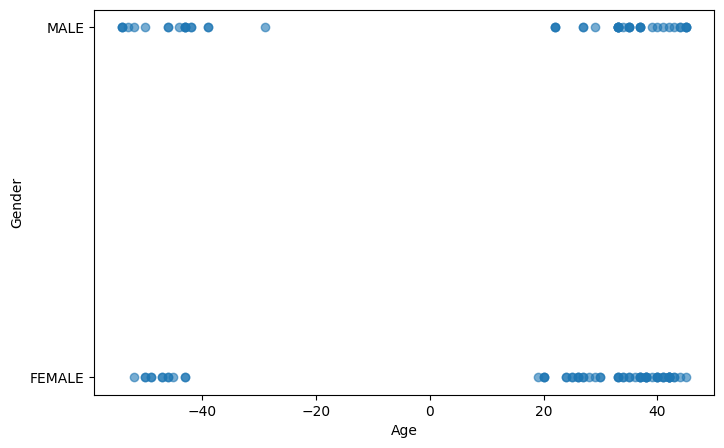

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df_with_both["age"], df_with_both["gender"], alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Gender")

plt.show()

### without Gender and Birth Value

In [ ]:
df = df.drop(columns=["date_of_birth", "gender"], axis=1).reset_index(drop = True)
df.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0   6821860387409851780       2016-07-26              -0.327119            90   
1   3372770238413923649       2016-06-20              -0.389015            26   
2   3220055865641973068       2016-06-15              -0.344771            90   
3   1603206957613929399       2016-06-20              -1.139010            33   
4  17331442057655027512       2016-05-12              -0.168271            27   

   amount_before_discount  amount_discount    unique_customer_id  
0               -0.411608        -0.443104  14833856522183602191  
1               -0.331083        -0.281383    219680563978627406  
2               -0.447712        -0.488551  13102778631438780637  
3               -1.580552        -1.771293  13698985552782800647  
4               -0.124056        -0.092018   8221697626171255583

In [ ]:
df = df.drop(columns=["unique_customer_id"], axis=1).reset_index(drop = True)
df["transaction_date"] = pd.to_datetime(df["transaction_date"], format="%Y-%m-%d")
df["Day"] = df["transaction_date"].dt.day
df["Month"] = df["transaction_date"].dt.month
df.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0   6821860387409851780       2016-07-26              -0.327119            90   
1   3372770238413923649       2016-06-20              -0.389015            26   
2   3220055865641973068       2016-06-15              -0.344771            90   
3   1603206957613929399       2016-06-20              -1.139010            33   
4  17331442057655027512       2016-05-12              -0.168271            27   

   amount_before_discount  amount_discount  Day  Month  
0               -0.411608        -0.443104   26      7  
1               -0.331083        -0.281383   20      6  
2               -0.447712        -0.488551   15      6  
3               -1.580552        -1.771293   20      6  
4               -0.124056        -0.092018   12      5

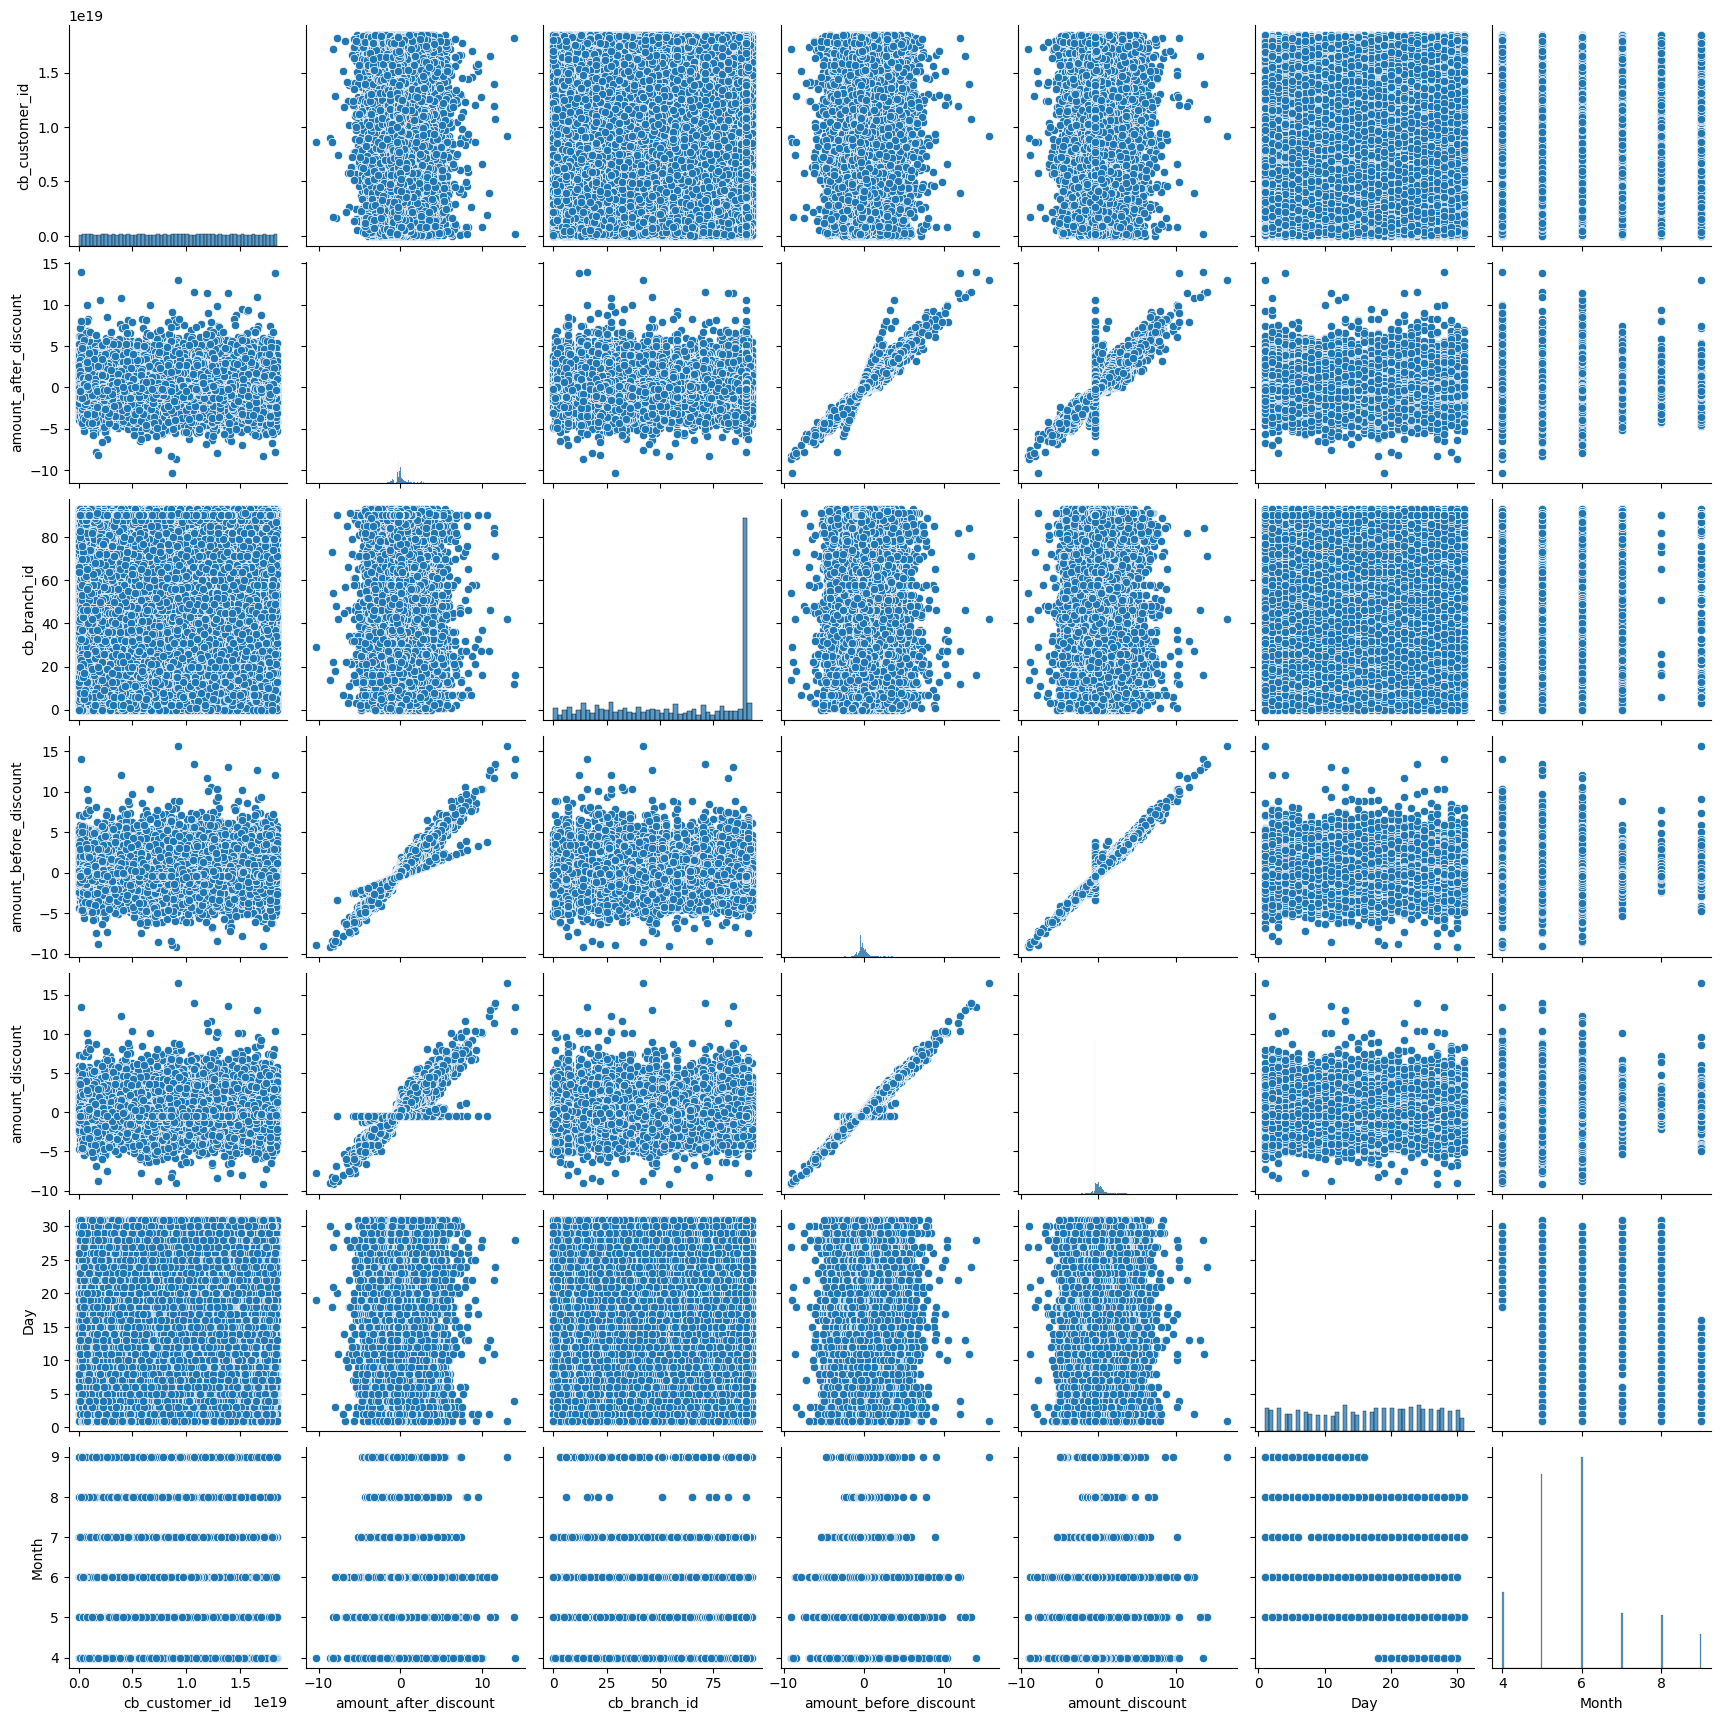

In [ ]:
sns.pairplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153213 entries, 0 to 153212
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   cb_customer_id          153213 non-null  uint64        
 1   transaction_date        153213 non-null  datetime64[ns]
 2   amount_after_discount   153213 non-null  float64       
 3   cb_branch_id            153213 non-null  int64         
 4   amount_before_discount  153213 non-null  float64       
 5   amount_discount         153213 non-null  float64       
 6   Day                     153213 non-null  int32         
 7   Month                   153213 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), uint64(1)
memory usage: 8.2 MB


In [ ]:
df.to_csv("clean_dataset.csv", index=False)

# Model

In [ ]:
!pip install lifetimes

In [ ]:
import pandas as pd
import warnings
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import dill
from lifetimes import GammaGammaFitter
from lifetimes.plotting import *
from lifetimes.utils import *
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_probability_alive_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## CLV

In [ ]:
df = pd.read_csv("clean_dataset.csv")
df.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0   6821860387409851780       2016-07-26              -0.327119            90   
1   3372770238413923649       2016-06-20              -0.389015            26   
2   3220055865641973068       2016-06-15              -0.344771            90   
3   1603206957613929399       2016-06-20              -1.139010            33   
4  17331442057655027512       2016-05-12              -0.168271            27   

   amount_before_discount  amount_discount  Day  Month  
0               -0.411608        -0.443104   26      7  
1               -0.331083        -0.281383   20      6  
2               -0.447712        -0.488551   15      6  
3               -1.580552        -1.771293   20      6  
4               -0.124056        -0.092018   12      5

### Data Preprocessing

In [ ]:
last_order_date = df['transaction_date'].max()
min_order_date = df['transaction_date'].min()
print("Veride gözlemlenen ilk işlem tarihi:", min_order_date)
print("Veride gözlemlenen son işlem tarihi:", last_order_date)
print("--------------------------------------")

Veride gözlemlenen ilk işlem tarihi: 2016-04-18
Veride gözlemlenen son işlem tarihi: 2016-09-16
--------------------------------------


In [ ]:
df['cb_customer_id'].nunique() # Unique Customer Count

133074

#### Frequency, T, Recency

- Frequency: Represents the number of repeat purchases made by the customer.

- T: Represents the age of the customer in the selected time units (daily in our dataset).

Equals the time between the customer's first purchase and the end of the period under review.

- Recency: Analysis Date - The first purchase date represents the age of the customer when they made their most recent purchase.
Equals the time between the customer's first purchase and their last purchase. (So if they only made 1 purchase, it's 0.)

In [ ]:
data = summary_data_from_transaction_data(df, 'cb_customer_id', 'transaction_date', 'amount_after_discount',
                                          observation_period_end=last_order_date, freq="D")
data.head(20)

frequency  recency      T  monetary_value
cb_customer_id                                             
14308477752365          0.0      0.0   86.0             0.0
92185499525472          0.0      0.0  115.0             0.0
175836837345171         0.0      0.0  133.0             0.0
176083477139127         0.0      0.0   98.0             0.0
242413306993657         0.0      0.0  129.0             0.0
437489842580617         0.0      0.0  144.0             0.0
650929513118729         0.0      0.0   94.0             0.0
735049241989114         0.0      0.0   25.0             0.0
1046879074033002        0.0      0.0   75.0             0.0
1329544044897235        0.0      0.0  139.0             0.0
1369510400010766        0.0      0.0   23.0             0.0
1411332864073024        0.0      0.0   18.0             0.0
1425407462396543        0.0      0.0   12.0             0.0
1460211215168106        0.0      0.0   94.0             0.0
1521606061946235        0.0      0.0    9.0             0.0
1588149747165806        0.0      0.0  149.0             0.0
1685324822910733        0.0      0.0  112.0             0.0
1713209607429393        0.0      0.0   82.0             0.0
2007148024698028        0.0      0.0  123.0             0.0
2101116844799163        0.0      0.0  101.0             0.0

In [ ]:
df[df["cb_customer_id"]==1046879074033002	].groupby("cb_customer_id").sum() # Only 1 purchase was made (no repeats) so frequency and recency values ​​are 0

transaction_date  amount_after_discount  cb_branch_id  \
cb_customer_id                                                           
1046879074033002       2016-07-03              -0.221227            90   

                  amount_before_discount  amount_discount  Day  Month  
cb_customer_id                                                         
1046879074033002               -0.400211        -0.488551    3      7

In [ ]:
df['cb_customer_id'].value_counts()

cb_customer_id
2720852094252288832     66
1051088297304856431     60
8927417458717481851     58
7249537811432129589     38
10213807435026438240    36
                        ..
7860666251329054531      1
9993804868103454618      1
10200738814698111231     1
6314348434065786861      1
13843149890432685203     1
Name: count, Length: 133074, dtype: int64

In [ ]:
data[data.index==2720852094252288832] # Frequency and recency values ​​of a customer who has shopped 66 times

frequency  recency      T  monetary_value
cb_customer_id                                                
2720852094252288832       43.0    115.0  117.0       -0.051368

count    133074.000000
mean          0.100230
std           0.442488
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          43.000000
Name: frequency, dtype: float64

 Sadece 1 kez alışveriş yapanlar % 0.916


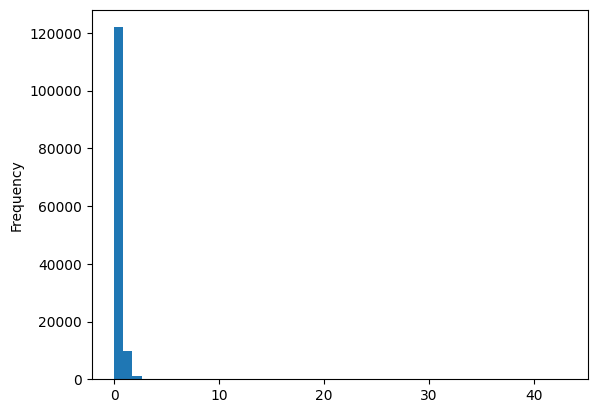

In [ ]:
# Almost 91% of all users in our dataset have made a purchase once.
data['frequency'].plot(kind='hist', bins=50)
print(data['frequency'].describe())
print("\n","Sadece 1 kez alışveriş yapanlar %",round(sum(data['frequency'] == 0)/len(data),3))

### BGF

#### Predicting Customer Loyalty and Purchase Likelihood

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.01) #L2
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 133074 subjects, a: 0.46, alpha: 2.42, b: 0.08, r: 0.02>


In [ ]:
bgf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r      0.024812  0.000313         0.024199         0.025426
alpha  2.423835  0.073016         2.280724         2.566947
a      0.458693  0.012363         0.434461         0.482924
b      0.082204  0.003157         0.076016         0.088392

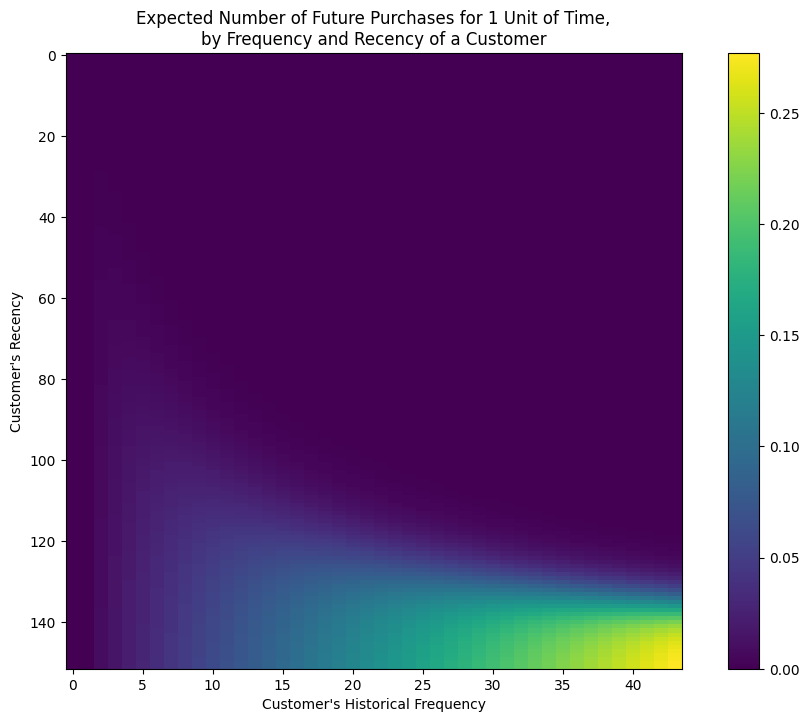

In [ ]:
fig = plt.figure(figsize=(12,8));
plot_frequency_recency_matrix(bgf);

if the last purchase was made when it was ~145 days ago, then they are our best customers.
Customers who have made many purchases and made these transactions recently will be our best customers in the future.
We can observe a different user type in the 15–45 range. Since we have not seen these customers recently, they may make a purchase again. However, we cannot exactly predict whether these customers have left us or are in their purchasing cycle.

#### Probability of Alive

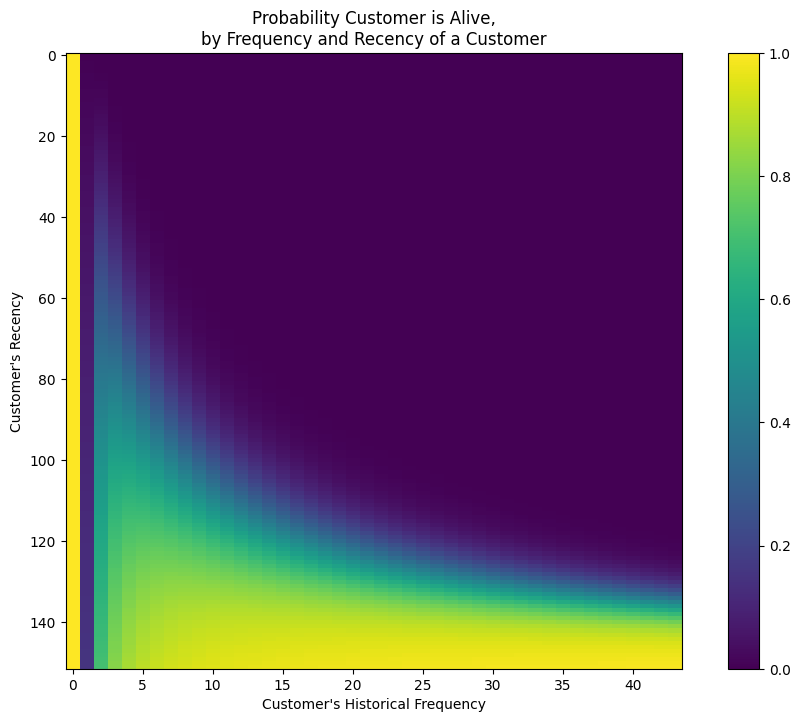

In [ ]:
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf);

In [ ]:
# Calculating customer alive probabilities
data['probability_alive'] = bgf.conditional_probability_alive(data['frequency'], data['recency'], data['T'])
data.head(10)

frequency  recency      T  monetary_value  probability_alive
cb_customer_id                                                                
14308477752365          0.0      0.0   86.0             0.0                1.0
92185499525472          0.0      0.0  115.0             0.0                1.0
175836837345171         0.0      0.0  133.0             0.0                1.0
176083477139127         0.0      0.0   98.0             0.0                1.0
242413306993657         0.0      0.0  129.0             0.0                1.0
437489842580617         0.0      0.0  144.0             0.0                1.0
650929513118729         0.0      0.0   94.0             0.0                1.0
735049241989114         0.0      0.0   25.0             0.0                1.0
1046879074033002        0.0      0.0   75.0             0.0                1.0
1329544044897235        0.0      0.0  139.0             0.0                1.0

recency < T : It means that the customer's past movements have not occurred in the recent period, that is, they have stagnated in the recent period.

In [ ]:
data[data['frequency']>0]

frequency  recency      T  monetary_value  \
cb_customer_id                                                    
3777317381860319            1.0      4.0  136.0       -1.560826   
4231672961395927            1.0      8.0  109.0       -0.132967   
4827986140363211            1.0     39.0   47.0        0.599510   
6027641298556693            1.0      2.0  131.0       -1.134588   
7187511524251217            1.0      8.0   96.0       -2.814052   
...                         ...      ...    ...             ...   
18438458280634053597        1.0     14.0   24.0       -0.747638   
18439761178056503209        4.0     35.0   88.0       -0.896446   
18440185923188136880        1.0      4.0  132.0       -0.071205   
18441514098785939606        1.0      6.0   45.0       -0.327119   
18444666556863044750        1.0      2.0  107.0       -1.210253   

                      probability_alive  
cb_customer_id                           
3777317381860319               0.007648  
4231672961395927               0.015562  
4827986140363211               0.130093  
6027641298556693               0.005431  
7187511524251217               0.017635  
...                                 ...  
18438458280634053597           0.099168  
18439761178056503209           0.161695  
18440185923188136880           0.007879  
18441514098785939606           0.029595  
18444666556863044750           0.006646  

[11141 rows x 5 columns]

#### Predict Purchases

In [ ]:
t = 30
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])
data.sort_values(by='predicted_purchases', ascending=False).head()
#Customers ranked from most to least likely to buy
#predicted_purchases, Expected Purchases
#top 5 customers (in 30 days)

frequency  recency      T  monetary_value  \
cb_customer_id                                                   
7799829773002608072       16.0     36.0   36.0       -0.149438   
2720852094252288832       43.0    115.0  117.0       -0.051368   
8927417458717481851       41.0    115.0  116.0       -0.195078   
1051088297304856431       42.0    144.0  146.0        0.007553   
7249537811432129589       27.0    146.0  146.0       -0.191580   

                     probability_alive  predicted_purchases  
cb_customer_id                                               
7799829773002608072           0.970485            10.497926  
2720852094252288832           0.977955            10.020014  
8927417458717481851           0.984053             9.690721  
1051088297304856431           0.980637             7.973744  
7249537811432129589           0.982718             5.137251

#### Model Compatibility Assessment

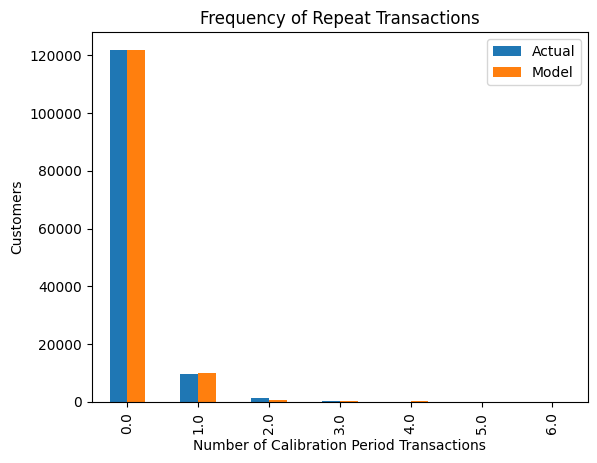

In [ ]:
plot_period_transactions(bgf);

In [ ]:
# State of the data that our model does not see
# First transaction date observed in the data: 2016-04-18
# Last transaction date observed in the data: 2016-09-16

from lifetimes.utils import calibration_and_holdout_data
summary_cal_holdout = calibration_and_holdout_data(df, 'cb_customer_id', 'transaction_date',
                                        calibration_period_end='2016-08-18',   # train set range
                                        observation_period_end=last_order_date )   # end date
print(summary_cal_holdout.head())

                 frequency_cal  recency_cal  T_cal  frequency_holdout  \
cb_customer_id                                                          
14308477752365             0.0          0.0   57.0                0.0   
92185499525472             0.0          0.0   86.0                0.0   
175836837345171            0.0          0.0  104.0                0.0   
176083477139127            0.0          0.0   69.0                0.0   
242413306993657            0.0          0.0  100.0                0.0   

                 duration_holdout  
cb_customer_id                     
14308477752365               29.0  
92185499525472               29.0  
175836837345171              29.0  
176083477139127              29.0  
242413306993657              29.0  


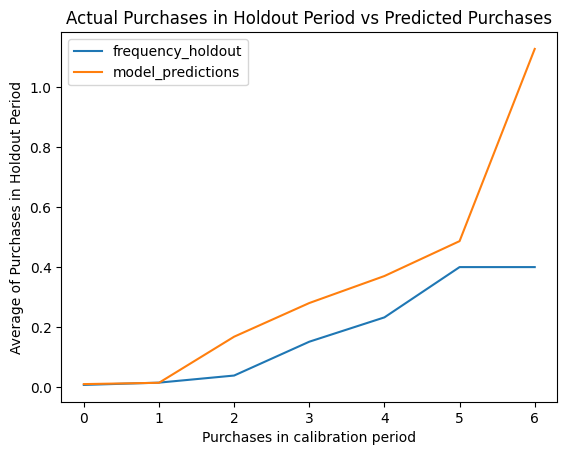

In [ ]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'],
        summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout);

Blue and orange lines indicate the train and test sets, respectively. In the plot_period_transactions histogram graph, we saw that there was no transaction in the 6th period, so the fit in the 0-1 range is more important for us.

In [ ]:
t = 10
individual = data.loc[7799829773002608072] # The best Customer
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

3.833744987048178

#### BGF Model Save

In [ ]:
with open('bgf_model.pkl', 'wb') as file:
    dill.dump(bgf, file)

#### Müşteri olasılık geçmişi Örnekleri

ConversionError: Failed to convert value(s) to axis units: '2016-05-23'

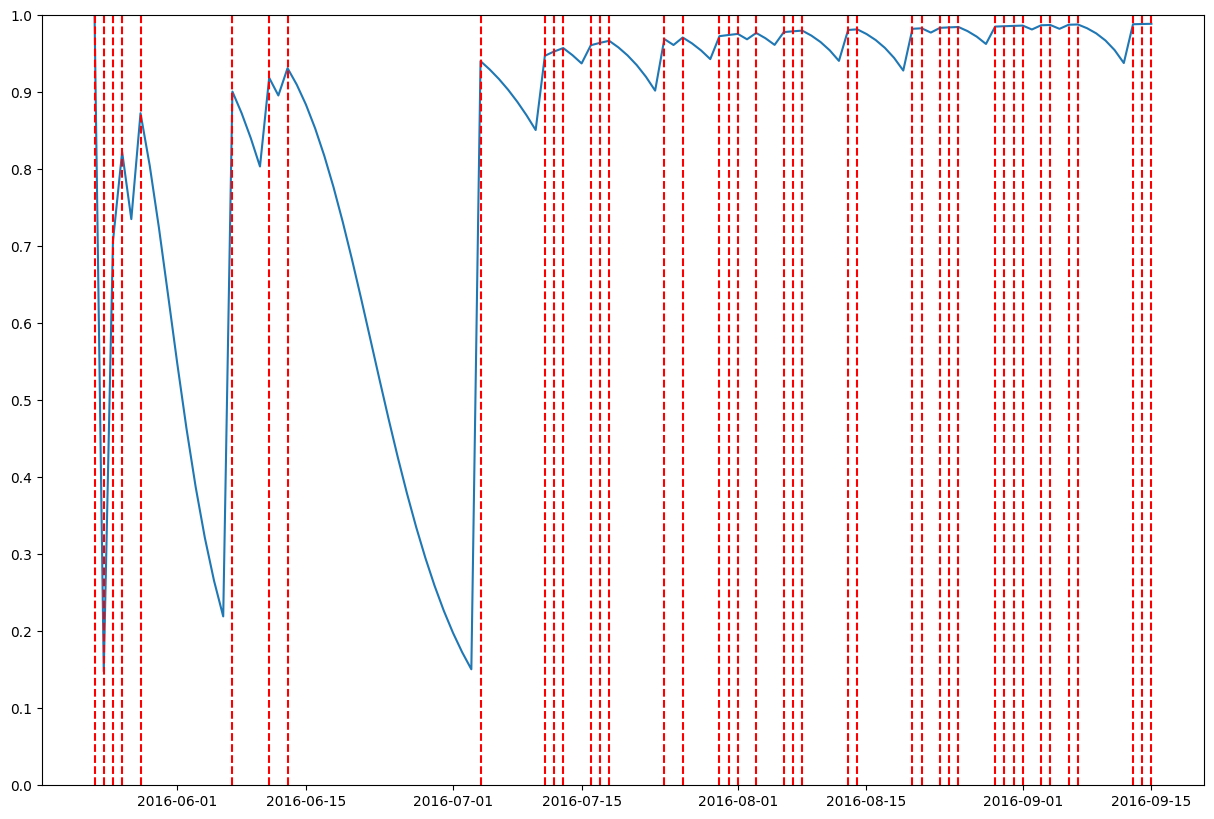

In [ ]:
from lifetimes.plotting import plot_history_alive

fig = plt.figure(figsize=(15,10))

id = 8927417458717481851 # A customer with churn intervals
days_since_birth = 50

sp_trans = df.loc[df['cb_customer_id'] == id]


plot_history_alive(bgf, days_since_birth, sp_trans, 'transaction_date');

ConversionError: Failed to convert value(s) to axis units: '2016-06-20'

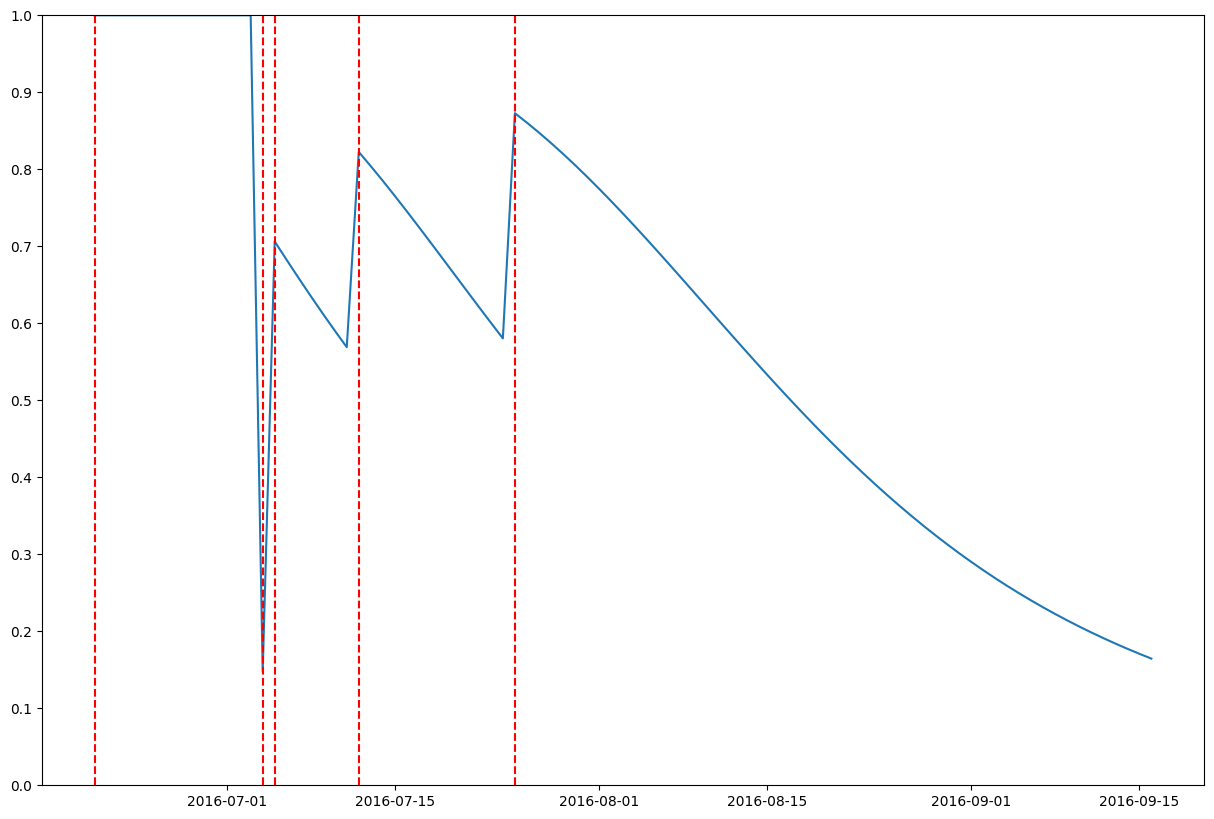

In [ ]:
fig = plt.figure(figsize=(15,10))

id = 18439761178056503209 # A customer with churn intervals
days_since_birth = 88

sp_trans = df.loc[df['cb_customer_id'] == id]


plot_history_alive(bgf, days_since_birth, sp_trans, 'transaction_date');

ConversionError: Failed to convert value(s) to axis units: '2016-07-12'

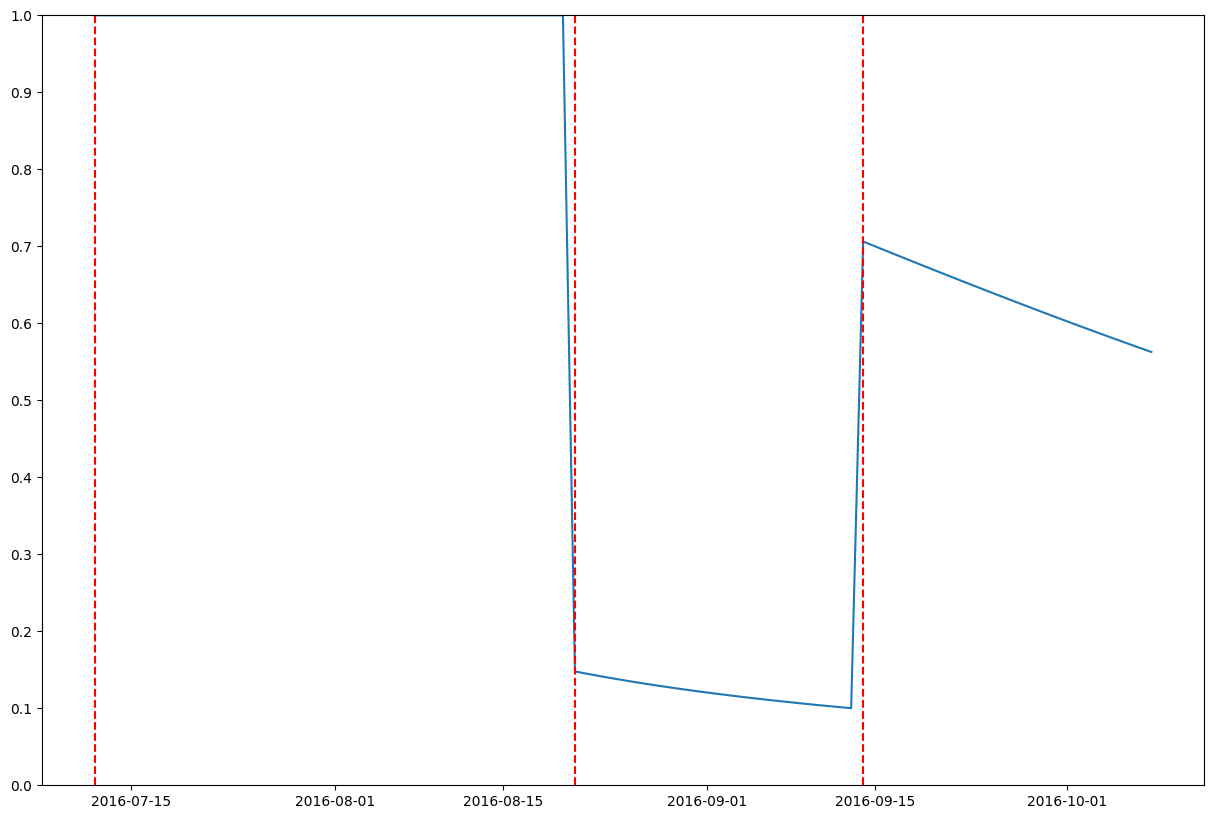

In [ ]:
fig = plt.figure(figsize=(15,10))

id = 9628745196624864028 # A customer with churn intervals
days_since_birth = 88

sp_trans = df.loc[df['cb_customer_id'] == id]


plot_history_alive(bgf, days_since_birth, sp_trans, 'transaction_date');

### Applying Frequency Filter

In [ ]:
# Here, in order to establish the GammaGamma model, we need to select users who have repeated their purchases at least once.
returning_customers_summary = data[(data['frequency']>0.0)&(data['monetary_value']>0)]
print(returning_customers_summary.head())
print(len(returning_customers_summary)) # Unique Customer Count

                   frequency  recency      T  monetary_value  \
cb_customer_id                                                 
4827986140363211         1.0     39.0   47.0        0.599510   
14438618179237143        2.0     20.0  139.0        0.365336   
15023029588547696        1.0     12.0  108.0        0.192138   
17830418310447997        2.0     43.0  133.0        3.086040   
18181582572154184        1.0      6.0   83.0        0.085114   

                   probability_alive  predicted_purchases  
cb_customer_id                                             
4827986140363211            0.130093             0.069808  
14438618179237143           0.053626             0.021837  
15023029588547696           0.021772             0.005631  
17830418310447997           0.205303             0.087113  
18181582572154184           0.016412             0.005384  
2333


### GGF

#### Create GGF Model

In [ ]:
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2333 subjects, p: 0.78, q: 3.37, v: 2.46>


#### Profits

Our 10 customers who we think will bring us the most profit

In [ ]:
print(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']).sort_values(ascending=False).head(10))

cb_customer_id
4952157969782045709     2.590361
10890527648903844655    2.438962
12734303353141956154    2.304863
18366412297361037914    2.140441
11303256650107851101    2.127430
14662232305892291718    2.022424
9100489199533128291     1.968887
6571700486774230815     1.917581
3363237777926028870     1.827297
9192849890763263713     1.795289
dtype: float64


Avarage Profit

In [ ]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    ).mean(),
    data[data['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 0.7848369382563267, Average profit: -0.5729448641226612


#### GGF Model Save

In [ ]:
with open('ggf_model.pkl', 'wb') as file:
    dill.dump(ggf, file)

### CLV

In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
                                   data['frequency'],
                                   data['recency'],
                                   data['T'],
                                   data['monetary_value'],
                                   time=1,  # 1 month
                                   freq="W",  # Frequency information of T.
                                   discount_rate=0.01)

In [ ]:
cltv = cltv.reset_index()
cltv.sort_values(by="clv", ascending=False).head(10)

cb_customer_id       clv
59175    8234431206244066026  0.521734
36228    5033739705880288720  0.271828
15409    2146605092293249644  0.237160
129965  18015554071894353576  0.204990
114045  15799166834651546890  0.168745
73895   10253485743499087026  0.128099
21328    2980755957691737984  0.117922
130324  18063432806594358558  0.106268
107431  14870919953359839507  0.100499
69403    9628745196624864028  0.096738

In [ ]:
cltv = data.merge(cltv, on="cb_customer_id", how='left')
cltv.sort_values(by="clv", ascending=False).head(10)

cb_customer_id  frequency  recency      T  monetary_value  \
59175    8234431206244066026        3.0     13.0   16.0        1.323180   
36228    5033739705880288720        2.0      2.0    4.0       -0.135970   
15409    2146605092293249644       10.0    139.0  148.0        0.937104   
129965  18015554071894353576        2.0      7.0   10.0        0.144716   
114045  15799166834651546890        3.0     16.0   29.0        0.941358   
73895   10253485743499087026        1.0      2.0    2.0        1.858913   
21328    2980755957691737984        2.0      8.0   11.0       -0.397545   
130324  18063432806594358558        2.0     42.0   62.0        2.546993   
107431  14870919953359839507        2.0      8.0   10.0       -0.609511   
69403    9628745196624864028        2.0     64.0   66.0        1.562405   

        probability_alive  predicted_purchases       clv  
59175            0.726154             2.718345  0.521734  
36228            0.525753             2.893747  0.271828  
15409            0.914292             1.748357  0.237160  
129965           0.574141             1.939986  0.204990  
114045           0.474470             1.138109  0.168745  
73895            0.151977             0.522807  0.128099  
21328            0.585702             1.864310  0.117922  
130324           0.526410             0.445654  0.106268  
107431           0.623158             2.105612  0.100499  
69403            0.689612             0.552689  0.096738

In [ ]:
cltv = cltv.reset_index(drop = True)
cltv

cb_customer_id  frequency  recency      T  monetary_value  \
0             14308477752365        0.0      0.0   86.0             0.0   
1             92185499525472        0.0      0.0  115.0             0.0   
2            175836837345171        0.0      0.0  133.0             0.0   
3            176083477139127        0.0      0.0   98.0             0.0   
4            242413306993657        0.0      0.0  129.0             0.0   
...                      ...        ...      ...    ...             ...   
133069  18445621641328584254        0.0      0.0   85.0             0.0   
133070  18445949908277463854        0.0      0.0  132.0             0.0   
133071  18446119882027420923        0.0      0.0   79.0             0.0   
133072  18446225276643825928        0.0      0.0  107.0             0.0   
133073  18446562698459349002        0.0      0.0  115.0             0.0   

        probability_alive  predicted_purchases       clv  scaled_clv segment  
0                     1.0             0.007393  0.000993    0.274901       B  
1                     1.0             0.005732  0.000752    0.274565       D  
2                     1.0             0.005032  0.000653    0.274427       D  
3                     1.0             0.006601  0.000877    0.274739       C  
4                     1.0             0.005172  0.000673    0.274455       D  
...                   ...                  ...       ...         ...     ...  
133069                1.0             0.007468  0.001005    0.274916       B  
133070                1.0             0.005066  0.000658    0.274434       D  
133071                1.0             0.007951  0.001077    0.275017       B  
133072                1.0             0.006111  0.000806    0.274640       C  
133073                1.0             0.005732  0.000752    0.274565       D  

[133074 rows x 10 columns]

In [ ]:
cltv.to_csv("cltv.csv", index=False)

## Churn

### Data Preprocessing

In [ ]:
df = pd.read_csv("clean_dataset.csv")
df['cb_customer_id'] = df['cb_customer_id'].astype('int')
df.head()

cb_customer_id transaction_date  amount_after_discount  cb_branch_id  \
0  6821860387409851780       2016-07-26              -0.327119            90   
1  3372770238413923649       2016-06-20              -0.389015            26   
2  3220055865641973068       2016-06-15              -0.344771            90   
3  1603206957613929399       2016-06-20              -1.139010            33   
4 -1115302016054524104       2016-05-12              -0.168271            27   

   amount_before_discount  amount_discount  Day  Month  
0               -0.411608        -0.443104   26      7  
1               -0.331083        -0.281383   20      6  
2               -0.447712        -0.488551   15      6  
3               -1.580552        -1.771293   20      6  
4               -0.124056        -0.092018   12      5

In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
last_order_date = df['transaction_date'].max()
min_order_date = df['transaction_date'].min()
print("Date of the first transaction observed in the data:", min_order_date)
print("Date of the last transaction observed in the data:", last_order_date)
print("--------------------------------------")

Date of the first transaction observed in the data: 2016-04-18 00:00:00
Date of the last transaction observed in the data: 2016-09-16 00:00:00
--------------------------------------


### An Alternative way of Calculating RFM

#### RFM Calculation behind the function that used in the CLV

In [ ]:
rfm_data = df.groupby('cb_customer_id').agg(
    Recency=('transaction_date', lambda x: (last_order_date - x.max()).days),
    Frequency=('transaction_date', 'count'),
    Monetary=('amount_after_discount', 'sum')  # total amount
).reset_index()
rfm_data

cb_customer_id  Recency  Frequency  Monetary
0      -9223342498649612850      109          1  0.052339
1      -9223102749015745762      129          1  0.424764
2      -9223086830577510692       98          1  0.096488
3      -9223031731616956124       54          1 -0.284781
4      -9222994071330125716       69          1 -0.212382
...                     ...      ...        ...       ...
133069  9222625825312595035       31          1  0.096488
133070  9222653571706048194       83          1  0.310026
133071  9222693158018575516       88          1 -0.468334
133072  9223089165516424268       96          1 -0.468334
133073  9223250821027715992      130          1  0.001157

[133074 rows x 4 columns]

#### Churn Score Calculation

In [ ]:
rfm_extended = df.groupby('cb_customer_id').agg(
    First_Purchase=('transaction_date', 'min'),  # First trx
    Last_Purchase=('transaction_date', 'max'),   # Last trx
    Frequency=('transaction_date', 'count'),  # trx count
    Monetary=('amount_after_discount', 'sum'),  # total amount
    Avg_Transaction_Value=('amount_after_discount', 'mean'),  # avarage trx amount
    Total_Discount_Used=('amount_discount', 'sum'),  # total discount
    Discount_Ratio=('amount_discount', lambda x: x.sum() / (x.sum() + df['amount_before_discount'].sum()))  # discount ratio
).reset_index()

rfm_extended['Tenure'] = (rfm_extended['Last_Purchase'] - rfm_extended['First_Purchase']).dt.days # Customer Age
rfm_extended['Recency'] = (last_order_date - rfm_extended['Last_Purchase']).dt.days # Days Since Last Trx
rfm_extended['Avg_Days_Between_Transactions'] = rfm_extended['Tenure'] / rfm_extended['Frequency'] # Avarega days between trxs
rfm_extended['Churn_Score'] = rfm_extended['Recency'] / (rfm_extended['Frequency'] + 1)
rfm_extended['Inactive_Days'] = (last_order_date - rfm_extended['Last_Purchase']).dt.days # Time elapsed since last trx
rfm_extended['Low_Activity_Customer'] = np.where(rfm_extended['Frequency'] < 2, 1, 0) # Those who have made less than 2 transactions in 6 months

rfm_extended

cb_customer_id First_Purchase Last_Purchase  Frequency  Monetary  \
0      -9223342498649612850     2016-05-30    2016-05-30          1  0.052339   
1      -9223102749015745762     2016-05-10    2016-05-10          1  0.424764   
2      -9223086830577510692     2016-06-10    2016-06-10          1  0.096488   
3      -9223031731616956124     2016-07-24    2016-07-24          1 -0.284781   
4      -9222994071330125716     2016-07-09    2016-07-09          1 -0.212382   
...                     ...            ...           ...        ...       ...   
133069  9222625825312595035     2016-08-16    2016-08-16          1  0.096488   
133070  9222653571706048194     2016-06-25    2016-06-25          1  0.310026   
133071  9222693158018575516     2016-06-20    2016-06-20          1 -0.468334   
133072  9223089165516424268     2016-06-12    2016-06-12          1 -0.468334   
133073  9223250821027715992     2016-05-09    2016-05-09          1  0.001157   

        Avg_Transaction_Value  Total_Discount_Used  Discount_Ratio  Tenure  \
0                    0.052339             0.605599       -0.027789       0   
1                    0.424764            -0.098835        0.004393       0   
2                    0.096488             0.373810       -0.016972       0   
3                   -0.284781            -0.436287        0.019106       0   
4                   -0.212382            -0.403350        0.017689       0   
...                       ...                  ...             ...     ...   
133069               0.096488            -0.374946        0.016464       0   
133070               0.310026            -0.444240        0.019448       0   
133071              -0.468334            -0.273804        0.012077       0   
133072              -0.468334            -0.488551        0.021346       0   
133073               0.001157             0.309060       -0.013991       0   

        Recency  Avg_Days_Between_Transactions  Churn_Score  Inactive_Days  \
0           109                            0.0         54.5            109   
1           129                            0.0         64.5            129   
2            98                            0.0         49.0             98   
3            54                            0.0         27.0             54   
4            69                            0.0         34.5             69   
...         ...                            ...          ...            ...   
133069       31                            0.0         15.5             31   
133070       83                            0.0         41.5             83   
133071       88                            0.0         44.0             88   
133072       96                            0.0         48.0             96   
133073      130                            0.0         65.0            130   

        Low_Activity_Customer  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
133069                      1  
133070                      1  
133071                      1  
133072                      1  
133073                      1  

[133074 rows x 14 columns]

#### High Risk Customer

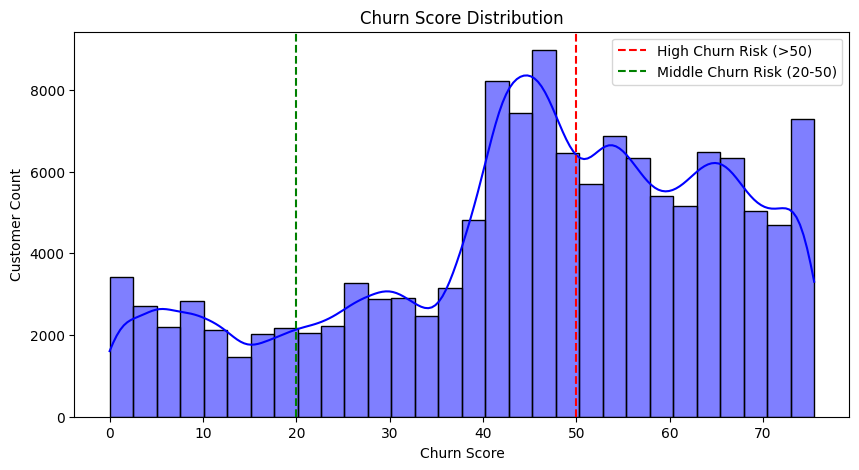

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(rfm_extended['Churn_Score'], bins=30, kde=True, color='blue')
plt.axvline(x=50, color='r', linestyle='--', label='High Churn Risk (>50)')
plt.axvline(x=20, color='g', linestyle='--', label='Middle Churn Risk (20-50)')
plt.title("Churn Score Distribution")
plt.xlabel("Churn Score")
plt.ylabel("Customer Count")
plt.legend()
plt.show()

### Churn Prediction - Supervised

#### Churn Prediction

Suggested churn definitions:

If the customer has not made any transactions in the last 60 days (Recency > 60), let's consider churn.

If the customer has made only one transaction in 6 months (Low_Activity_Customer = 1), let's consider churn.

If the customer has not spent anything in 6 months (Monetary = 0), let's consider churn.


Using these rules, let's mark churned customers as 1 and non-churned customers as 0.

Accuracy:  0.9998872816081157
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00     26079

    accuracy                           1.00     26615
   macro avg       1.00      1.00      1.00     26615
weighted avg       1.00      1.00      1.00     26615



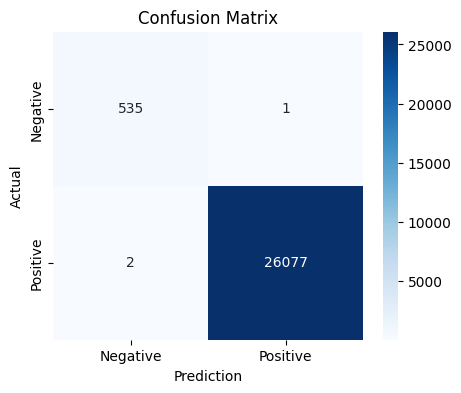

In [ ]:
rfm_extended['Churn'] = np.where((rfm_extended['Recency'] > 60) |
                                 (rfm_extended['Low_Activity_Customer'] == 1) |
                                 (rfm_extended['Monetary'] == 0), 1, 0)

features = ['Recency', 'Frequency', 'Monetary', 'Avg_Transaction_Value',
            'Discount_Ratio', 'Churn_Score', 'Inactive_Days', 'Low_Activity_Customer']

X = rfm_extended[features]
y = rfm_extended['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report: \n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Model Save

In [ ]:
with open('logistic_reg_churn.pkl', 'wb') as file:
    dill.dump(log_reg, file)

### Churn Prediction - Unsupervised

#### Unpuervised Anomaly Detection

In [ ]:
features_clustering = ['Recency', 'Frequency', 'Monetary']
X_clustering = rfm_extended[features_clustering]

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm_extended['KMeans_Cluster'] = kmeans.fit_predict(X_clustering)

iso_forest = IsolationForest(contamination=0.15, random_state=42)  # Customers with a 15% churn risk
rfm_extended['Anomaly_Score'] = iso_forest.fit_predict(X_clustering)

#### Model Save

In [ ]:
with open('IsolationForest_churn.pkl', 'wb') as file:
    dill.dump(iso_forest, file)

### Outputs

```
• Cluster 0 (Purple): Those with medium churn risk.
• Cluster 1 (Turquoise): Those with high Recency value, those who have not shopped for a long time. (They may be at risk of churn!)
• Cluster 2 (Yellow): Customers who have recently made transactions and are active.
```

Customers with high Recency and low Monetary may be at risk of churn!

Anomaly (Churn Risk) Analysis with Isolation Forest

Customers with Anomaly_Score = -1 are those at risk of churn.

Customers with Anomaly_Score = 1 are those who exhibit normal behavior.

Customers marked as anomalies may be those with low activity or those who do not spend.

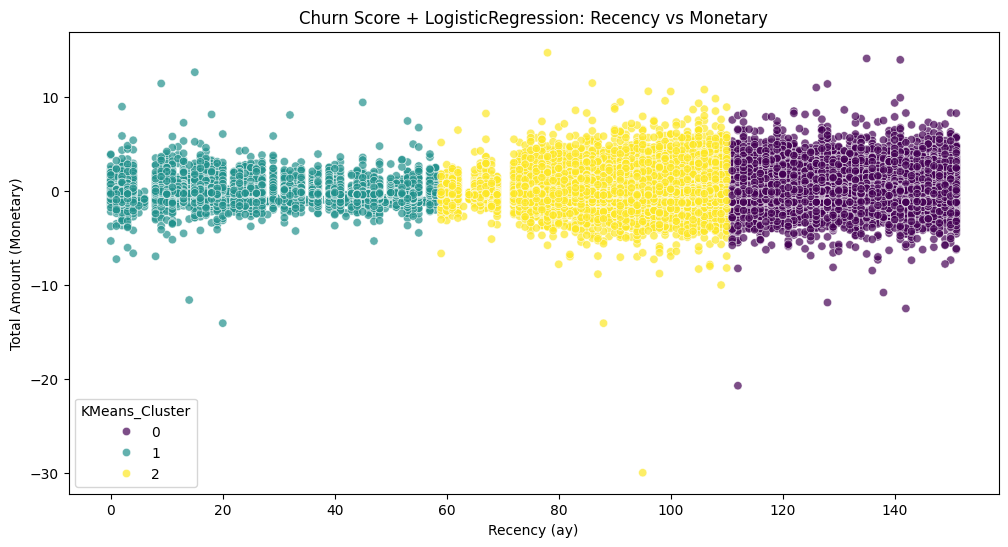

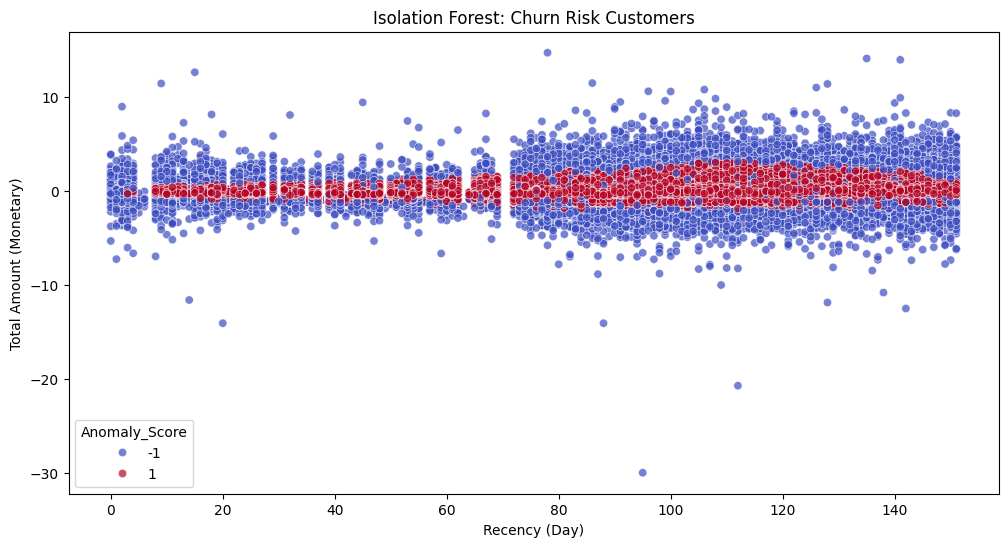

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm_extended, x='Recency', y='Monetary', hue='KMeans_Cluster', palette='viridis', alpha=0.7)
plt.title("Churn Score + LogisticRegression: Recency vs Monetary")
plt.xlabel("Recency (ay)")
plt.ylabel("Total Amount (Monetary)")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm_extended, x='Recency', y='Monetary', hue='Anomaly_Score', palette='coolwarm', alpha=0.7)
plt.title("Isolation Forest: Churn Risk Customers")
plt.xlabel("Recency (Day)")
plt.ylabel("Total Amount (Monetary)")
plt.show()

### Save Dataset

In [ ]:
rfm_extended.to_csv("rfm_extended.csv", index=False)

##Customer Segmentation

### Data Read

In [ ]:
rfm_extended = pd.read_csv("rfm_extended.csv")
rfm_extended.head()

cb_customer_id First_Purchase Last_Purchase  Frequency  Monetary  \
0 -9223342498649612850     2016-05-30    2016-05-30          1  0.052339   
1 -9223102749015745762     2016-05-10    2016-05-10          1  0.424764   
2 -9223086830577510692     2016-06-10    2016-06-10          1  0.096488   
3 -9223031731616956124     2016-07-24    2016-07-24          1 -0.284781   
4 -9222994071330125716     2016-07-09    2016-07-09          1 -0.212382   

   Avg_Transaction_Value  Total_Discount_Used  Discount_Ratio  Tenure  \
0               0.052339             0.605599       -0.027789       0   
1               0.424764            -0.098835        0.004393       0   
2               0.096488             0.373810       -0.016972       0   
3              -0.284781            -0.436287        0.019106       0   
4              -0.212382            -0.403350        0.017689       0   

   Recency  Avg_Days_Between_Transactions  Churn_Score  Inactive_Days  \
0      109                            0.0         54.5            109   
1      129                            0.0         64.5            129   
2       98                            0.0         49.0             98   
3       54                            0.0         27.0             54   
4       69                            0.0         34.5             69   

   Low_Activity_Customer  Churn  KMeans_Cluster  Anomaly_Score  
0                      1      1               2              1  
1                      1      1               0              1  
2                      1      1               2              1  
3                      1      1               1              1  
4                      1      1               2              1

In [ ]:
cltv = pd.read_csv("cltv.csv")
cltv.head()

cb_customer_id  frequency  recency      T  monetary_value  \
0    1.430848e+13        0.0      0.0   86.0             0.0   
1    9.218550e+13        0.0      0.0  115.0             0.0   
2    1.758368e+14        0.0      0.0  133.0             0.0   
3    1.760835e+14        0.0      0.0   98.0             0.0   
4    2.424133e+14        0.0      0.0  129.0             0.0   

   probability_alive  predicted_purchases       clv  scaled_clv segment  
0                1.0             0.007393  0.000993    0.274901       B  
1                1.0             0.005732  0.000752    0.274565       D  
2                1.0             0.005032  0.000653    0.274427       D  
3                1.0             0.006601  0.000877    0.274739       C  
4                1.0             0.005172  0.000673    0.274455       D

### With CLV Based Segmentation

Basically Qcut with clv

In [ ]:
#min max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv[["clv"]])
cltv["scaled_clv"] = scaler.transform(cltv[["clv"]])

cltv["segment"] = pd.qcut(cltv["scaled_clv"], 5, labels=["E","D", "C", "B", "A"])

In [ ]:
pd.set_option('display.max_columns', None)
cltv.groupby("segment").agg({"count","mean","sum"})

cb_customer_id                      frequency                   \
                   sum          mean  count       sum      mean  count   
segment                                                                  
E         2.530807e+23  9.235175e+18  27404    7846.0  0.286309  27404   
D         2.398273e+23  9.228740e+18  25987     408.0  0.015700  25987   
C         2.469326e+23  9.223541e+18  26772     476.0  0.017780  26772   
B         2.457289e+23  9.227867e+18  26629     749.0  0.028127  26629   
A         2.425159e+23  9.227451e+18  26282    3859.0  0.146831  26282   

         recency                           T                     \
             sum      mean  count        sum        mean  count   
segment                                                           
E        61650.0  2.249672  27404  3719309.0  135.721391  27404   
D         7647.0  0.294263  25987  3200678.0  123.164582  25987   
C         9895.0  0.369603  26772  2749627.0  102.705326  26772   
B        20398.0  0.766007  26629  2239871.0   84.113973  26629   
A        96799.0  3.683091  26282   900340.0   34.256906  26282   

        monetary_value                  probability_alive                   \
                   sum      mean  count               sum      mean  count   
segment                                                                      
E         -5630.926730 -0.205478  27404      20529.438908  0.749140  27404   
D           -28.372967 -0.001092  25987      25632.158848  0.986345  25987   
C           -33.519045 -0.001252  26772      26362.440363  0.984702  26772   
B           -99.511506 -0.003737  26629      25997.430956  0.976283  26629   
A          -590.848484 -0.022481  26282      24030.794252  0.914344  26282   

        predicted_purchases                          clv                   \
                        sum      mean  count         sum      mean  count   
segment                                                                     
E                180.472853  0.006586  27404   12.611916  0.000460  27404   
D                142.985423  0.005502  25987   18.301313  0.000704  25987   
C                172.965227  0.006461  26772   22.520259  0.000841  26772   
B                209.063526  0.007851  26629   27.379573  0.001028  26629   
A                925.403088  0.035211  26282  128.361277  0.004884  26282   

          scaled_clv                   
                 sum      mean  count  
segment                                
E        7513.034716  0.274158  27404  
D        7133.382565  0.274498  25987  
C        7353.968420  0.274689  26772  
B        7321.621717  0.274949  26629  
A        7367.321978  0.280318  26282

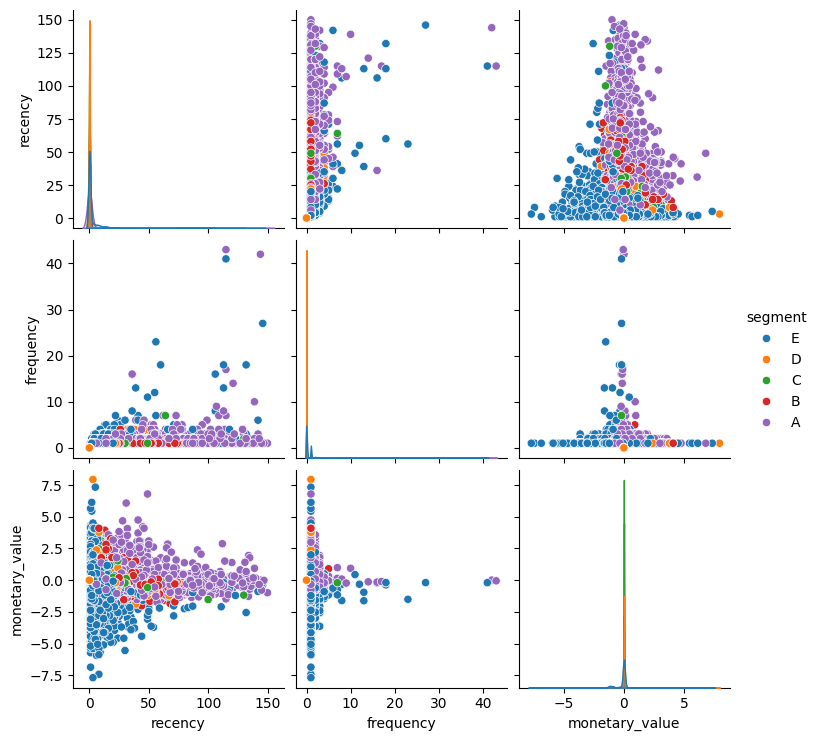

In [ ]:
sns.pairplot(cltv, vars=["recency", "frequency", "monetary_value"], hue='segment')

#### Model & Data Save

In [ ]:
cltv.to_csv("cltv_with_segments.csv", index=False)

In [ ]:
with open('scaler_segmentation.pkl', 'wb') as file:
    dill.dump(scaler, file)

### K-Means with RFM (Recency, Frequency, Monetary)

In [ ]:
features = ['Recency', 'Frequency', 'Monetary']
X = rfm_extended[features]

k_means = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_extended['Segment'] = k_means.fit_predict(X)
rfm_segments = rfm_extended.groupby('Segment')[features].mean()
rfm_segments

Recency  Frequency  Monetary
Segment                                 
0        136.215542   1.117995  0.086833
1         80.325942   1.165322 -0.076244
2         22.807841   1.158038 -0.199677
3        107.136185   1.167271  0.094097

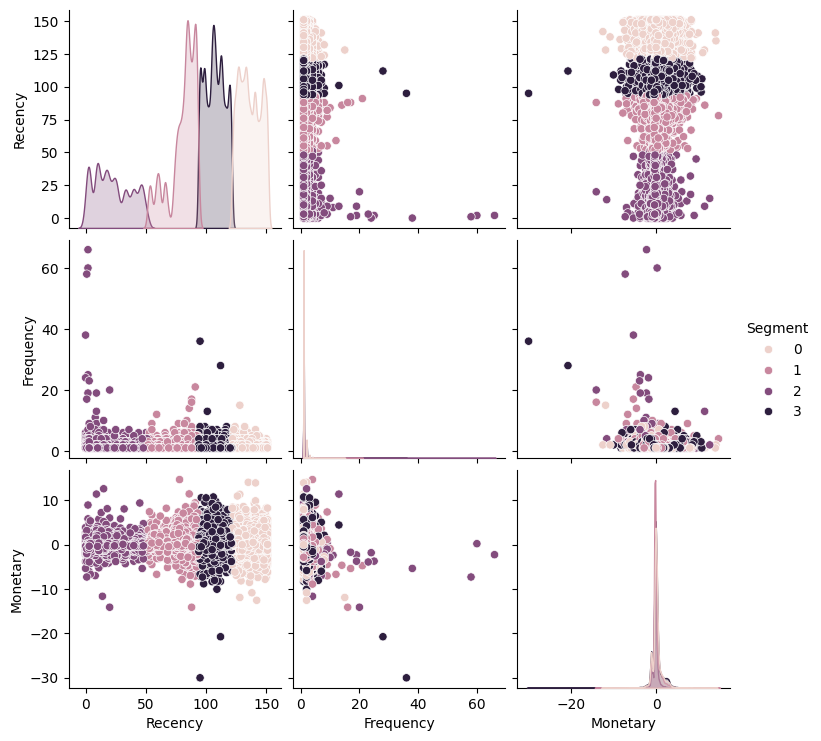

In [ ]:
sns.pairplot(rfm_extended, vars=["Recency", "Frequency", "Monetary"], hue='Segment')

#### Model and Data Save

In [ ]:
rfm_extended.to_csv("rfm_extended_with_segments.csv", index=False)

In [ ]:
with open('k_means_segmentation.pkl', 'wb') as file:
    dill.dump(k_means, file)